# Experimento mestrado 1
## Executando na pasta principal

In [1]:
import os
import numpy as np
os.chdir('../../../') #Executando na pasta Visual_Memory
import sys
sys.path.append('./include')
sys.path.append('./src')

## Copilando arquivos para teste

In [2]:
if os.system("cd Workbench/ && ./convertendo_all.sh && cd ..") != 0:
    print "Erro de copilação"
    sys.exit(0)

## Criando configurações padroes e arquivo de execução

In [3]:
ERRO = 1

os.system('sed -i \'s/time.time( )/self._bkb.read_float("VISION_RB20_TAG")/g\' ./include/Landmark.py')
os.system('sed -i \'s/time.time( )/self._bkb.read_float("VISION_RB20_TAG")/g\' ./include/KalmanFilter.py')
os.system('sed -i \'s/time.time( )/self._bkb.read_float("VISION_RB20_TAG")/g\' ./src/Behavior.py')
os.system('sed -i \'/time.sleep(delta)/d\' ./src/Behavior.py')
os.system('sed -i \'s/if delta > 0:/self._bkb.write_float("VISION_RB21_TAG", 0)\\n                while self._bkb.read_float("VISION_RB21_TAG") == 0:\\n                    time.sleep(0.5)/g\' ./src/Behavior.py')

text = open("./Data/config.ini", "w")
text.write("[KALMAN FILTER - ROBOTS]\nvision_error = "+ str(ERRO) +"\n\n[KALMAN FILTER - LANDMARKS]\nvision_error = "+ str(ERRO))
text.close()

text = open("./run.sh", "w")
text.write("#!/bin/bash\n\npython visualMemory.py --nr 3 --p 2000 --d --sd")
# text.write("#!/bin/bash\n\npython visualMemory.py --nr 3 --p 2000 --sd")
text.close()

In [4]:
from Blackboard import *
import random
import time
from copy import copy

In [5]:
bkb = Blackboard( )

In [6]:
bkb.write_float('VISION_RB20_TAG', 0) # tempo no now
bkb.write_float('VISION_RB21_TAG', 0) # Parando visual 

# Zerando robôs
bkb.write_float('VISION_RB01_TAG', 0)
bkb.write_float('VISION_RB02_TAG', 0)

bkb.write_float('VISION_LAND_TAG', 0)

bkb.write_float("VISUAL_MEMORY_LAND_LOC", 0)
bkb.write_float("VISUAL_MEMORY_LAND_X", 0)
bkb.write_float("VISUAL_MEMORY_LAND_Y", 0)

bkb.write_float("VISUAL_MEMORY_AL_01_LOC", 0)
bkb.write_float("VISUAL_MEMORY_AL_01_X", 0)
bkb.write_float("VISUAL_MEMORY_AL_01_Y", 0)
bkb.write_float("VISUAL_MEMORY_AL_01_MAX_VEL", 0)

bkb.write_float("VISUAL_MEMORY_OP_01_LOC", 0)
bkb.write_float("VISUAL_MEMORY_OP_01_X", 0)
bkb.write_float("VISUAL_MEMORY_OP_01_Y", 0)
bkb.write_float("VISUAL_MEMORY_OP_01_MAX_VEL", 0)

## Executando VisualMemory e removendo arquivo de execução

In [7]:
os.system("chmod 777 run.sh")
os.system("kill $(pidof -x ./run.sh)")
os.system("screen -d -m -S 'VisualMemory' './run.sh'")
os.system("gnome-terminal -x sh -c 'screen -R VisualMemory'")
os.system("rm run.sh")

0

In [8]:
FALHA = 80
FALHACOR = 60
# vx = 2; vy = 1; vax = 5; vay = -1; vox = -3; voy = -1.5; ω = 1°
listaLand = [
    {"tag": 1, "pos": [+6.00, +3.00], "movement": 1, "time": 0.0},
    {"tag": 1, "pos": [+5.03, +2.45], "movement": 1, "time": 0.5},
    {"tag": 1, "pos": [+4.05, +1.89], "movement": 1, "time": 1.0},
    {"tag": 1, "pos": [+3.08, +1.34], "movement": 1, "time": 1.5},
    {"tag": 1, "pos": [+2.10, +0.79], "movement": 1, "time": 2.0},
    {"tag": 1, "pos": [+1.13, +0.24], "movement": 1, "time": 2.5},
    {"tag": 1, "pos": [+0.15, -0.32], "movement": 1, "time": 3.0},
    {"tag": 1, "pos": [-0.83, -0.87], "movement": 1, "time": 3.5},
    {"tag": 1, "pos": [-1.81, -1.43], "movement": 1, "time": 4.0},
    {"tag": 1, "pos": [-2.78, -1.98], "movement": 1, "time": 4.5},
    {"tag": 1, "pos": [-3.76, -2.53], "movement": 1, "time": 5.0},
    {"tag": 1, "pos": [-4.74, -3.09], "movement": 1, "time": 5.5},
    {"tag": 1, "pos": [-5.72, -3.64], "movement": 1, "time": 6.0},
    {"tag": 1, "pos": [-6.70, -4.20], "movement": 1, "time": 6.5},
    {"tag": 1, "pos": [-7.68, -4.75], "movement": 1, "time": 7.0},
    {"tag": 1, "pos": [-8.66, -5.31], "movement": 1, "time": 7.5},
    {"tag": 1, "pos": [-9.64, -5.86], "movement": 1, "time": 8.0},
]

listaOponente = [
    {"tag": 1, "pos": [+7.00, +0.00], "movement": 1, "time": 0.0},
    {"tag": 1, "pos": [+4.49, -1.30], "movement": 1, "time": 0.5},
    {"tag": 1, "pos": [+1.97, -2.57], "movement": 1, "time": 1.0},
    {"tag": 1, "pos": [-0.56, -3.81], "movement": 1, "time": 1.5},
    {"tag": 1, "pos": [-3.11, -5.03], "movement": 1, "time": 2.0},
    {"tag": 1, "pos": [-5.66, -6.22], "movement": 1, "time": 2.5},
    {"tag": 1, "pos": [-8.23, -7.39], "movement": 1, "time": 3.0},
    {"tag": 1, "pos": [-10.8, -8.53], "movement": 1, "time": 3.5},
    {"tag": 1, "pos": [-13.4, -9.64], "movement": 1, "time": 4.0},
    {"tag": 1, "pos": [-16.0, -10.7], "movement": 1, "time": 4.5},
    {"tag": 1, "pos": [-18.6, -11.8], "movement": 1, "time": 5.0},
    {"tag": 1, "pos": [-21.3, -12.8], "movement": 1, "time": 5.5},
    {"tag": 1, "pos": [-23.9, -13.8], "movement": 1, "time": 6.0},
    {"tag": 1, "pos": [-26.5, -14.7], "movement": 1, "time": 6.5},
    {"tag": 1, "pos": [-29.1, -15.7], "movement": 1, "time": 7.0},
    {"tag": 1, "pos": [-31.8, -16.6], "movement": 1, "time": 7.5},
    {"tag": 1, "pos": [-34.5, -17.5], "movement": 1, "time": 8.0},
]

listaAliado = [
    {"tag": 3, "pos": [+6.00, +0.00], "movement": 1, "time": 0.0},
    {"tag": 3, "pos": [+4.00, -1.04], "movement": 1, "time": 0.5},
    {"tag": 3, "pos": [+1.98, -1.97], "movement": 1, "time": 1.0},
    {"tag": 3, "pos": [-0.04, -3.00], "movement": 1, "time": 1.5},
    {"tag": 3, "pos": [-2.07, -4.07], "movement": 1, "time": 2.0},
    {"tag": 3, "pos": [-4.11, -5.04], "movement": 1, "time": 2.5},
    {"tag": 3, "pos": [-6.16, -6.00], "movement": 1, "time": 3.0},
    {"tag": 3, "pos": [-8.21, -6.93], "movement": 1, "time": 3.5},
    {"tag": 3, "pos": [-10.3, -7.85], "movement": 1, "time": 4.0},
    {"tag": 3, "pos": [-12.3, -8.75], "movement": 1, "time": 4.5},
    {"tag": 3, "pos": [-14.4, -9.63], "movement": 1, "time": 5.0},
    {"tag": 3, "pos": [-16.5, -10.5], "movement": 1, "time": 5.5},
    {"tag": 3, "pos": [-18.6, -11.3], "movement": 1, "time": 6.0},
    {"tag": 3, "pos": [-20.7, -12.2], "movement": 1, "time": 6.5},
    {"tag": 3, "pos": [-22.8, -13.0], "movement": 1, "time": 7.0},
    {"tag": 3, "pos": [-24.9, -13.8], "movement": 1, "time": 7.5},
    {"tag": 3, "pos": [-27.0, -14.5], "movement": 1, "time": 8.0},
]


for lista in [listaLand, listaOponente, listaAliado]:
    for data in lista:
        if random.random() <= FALHA/100.0:
            data["pos"][0] += random.uniform(-ERRO, ERRO)
            data["pos"][1] += random.uniform(-ERRO, ERRO)
        else:
            lista.remove(data)

for lista in [listaOponente, listaAliado]:
    for data in lista:
        if random.random() > FALHACOR/100.0:
            data["tag"] = 2

In [9]:
# raw_input("Pronto para iniciar experimentos")
time.sleep(3)

clistaLand = []
clistaOponente = []
clistaAliado = []

for t in np.arange(0, 8.5, 0.5):
    if listaLand != [] and t == listaLand[0]["time"]:
        dataLand = listaLand.pop(0)
    else:
        dataLand = None
    
    if listaOponente != [] and t == listaOponente[0]["time"]:
        dataOponente = listaOponente.pop(0)
    else:
        dataOponente = None
    
    if listaAliado != [] and t == listaAliado[0]["time"]:
        dataAliado = listaAliado.pop(0)
    else:
        dataAliado = None
    
    print dataLand
    print dataAliado
    print dataOponente
    print '\n'
    clistaLand.append(dataLand)
    clistaAliado.append(dataAliado)
    clistaOponente.append(dataOponente)
    
    # Instante atual no tempo
    bkb.write_float('VISION_RB20_TAG', t + 0.5)
    
    if dataLand != None:
        bkb.write_float('VISION_LAND_X', dataLand['pos'][0])
        bkb.write_float('VISION_LAND_Y', dataLand['pos'][1])
        bkb.write_float('VISION_LAND_TIME', dataLand['time'] + 0.5)        
        bkb.write_float('VISION_LAND_MOV', dataLand['movement'])
        bkb.write_float('VISION_LAND_TAG', dataLand['tag'])
    
    if dataOponente != None:
        bkb.write_float('VISION_RB01_X', dataOponente['pos'][0])
        bkb.write_float('VISION_RB01_Y', dataOponente['pos'][1])
        bkb.write_float('VISION_RB01_TIME', dataOponente['time'] + 0.5)        
        bkb.write_float('VISION_RB01_MOV', dataOponente['movement'])
        bkb.write_float('VISION_RB01_TAG', dataOponente['tag'])
    
    if dataAliado != None:
        bkb.write_float('VISION_RB02_X', dataAliado['pos'][0])
        bkb.write_float('VISION_RB02_Y', dataAliado['pos'][1])
        bkb.write_float('VISION_RB02_TIME', dataAliado['time'] + 0.5)        
        bkb.write_float('VISION_RB02_MOV', dataAliado['movement'])
        bkb.write_float('VISION_RB02_TAG', dataAliado['tag'])
    
    # Iniciando
#     raw_input("Pronto para enviar")
    bkb.write_float('VISION_RB21_TAG', 1)
    
    while bkb.read_float('VISION_RB21_TAG'):
        pass
    
#     raw_input("Finalizado\n")

{'time': 0.0, 'tag': 1, 'pos': [6.591299611780617, 3.7386195734633088], 'movement': 1}
{'time': 0.0, 'tag': 3, 'pos': [6.561360267332101, -0.561271407450503], 'movement': 1}
{'time': 0.0, 'tag': 2, 'pos': [7.23551735869442, 0.7674543044131308], 'movement': 1}


{'time': 0.5, 'tag': 1, 'pos': [4.4303856100558505, 2.082415809965312], 'movement': 1}
{'time': 0.5, 'tag': 2, 'pos': [4.727639596951514, -0.2990705199444761], 'movement': 1}
None


{'time': 1.0, 'tag': 1, 'pos': [3.3065118190867677, 2.0534110128084744], 'movement': 1}
{'time': 1.0, 'tag': 3, 'pos': [1.0536236191477688, -1.033456147570622], 'movement': 1}
{'time': 1.0, 'tag': 1, 'pos': [1.97, -2.57], 'movement': 1}


{'time': 1.5, 'tag': 1, 'pos': [3.87192692114477, 0.763684626512217], 'movement': 1}
{'time': 1.5, 'tag': 3, 'pos': [-0.6793400521709556, -2.3370397081454364], 'movement': 1}
{'time': 1.5, 'tag': 1, 'pos': [-0.6250796844089519, -3.971981458631762], 'movement': 1}


{'time': 2.0, 'tag': 1, 'pos': [1.6182023940379324,

In [10]:
os.system("kill $(pidof -x ./run.sh)")
dataRob1 = np.load("./Data/Thread-1-Robots.npy")
dataRob2 = np.load("./Data/Thread-2-Robots.npy")
dataLand = np.load("./Data/Land.npy")

In [11]:
clistaLand = [a for a in clistaLand if a != None]
clistaAliado = [a for a in clistaAliado if a != None]
clistaOponente = [a for a in clistaOponente if a != None]

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
DataRob1 = []
DataRob2 = []
DataLand = []
for save, data in zip([DataRob1, DataRob2], [dataRob1, dataRob2]):
    for medida in data:
        dados = []
        for tempo, pos, erro, covariance, time in [medida]:
            a = []
            a.append(tempo)
            a.extend(pos)
            a.extend(erro)
            a.extend(covariance)
            a.append(time)
            for i in xrange(len(a)):
                a[i] = float(a[i])
            save.append(a)

for save, data in zip([DataLand], [dataLand]):
    for medida in data:
        dados = []
        for tempo, pos, erro, covariance in [medida]:
            a = []
            a.append(tempo)
            a.extend(pos)
            a.extend(erro)
            a.extend(covariance)
            for i in xrange(len(a)):
                a[i] = float(a[i])
            save.append(a)

In [14]:
DataRob1 = pd.DataFrame(
    DataRob1,
    columns=[
        "Tempo",
        "Posição X",
        "Posição Y",
        "Velocidade X",
        "Velocidade Y",
        "Erro PX",
        "Erro PY",
        "Erro VX",
        "Erro VY",
        "Covariância PX",
        "Covariância PY",
        "Covariância VX",
        "Covariância VY",
        "Time",
    ]
)
DataRob1

,Tempo,Posição X,Posição Y,Velocidade X,Velocidade Y,Erro PX,Erro PY,Erro VX,Erro VY,Covariância PX,Covariância PY,Covariância VX,Covariância VY,Time
0,1.0,7.228296,0.766688,0.000000,0.000000,501.998003,501.998003,3000.000000,3000.000000,501.998003,0.0,1000.000000,0.0,0.0
1,1.0,4.838501,-1.066393,0.000000,0.000000,2252.994266,2252.994266,3067.720949,3067.720949,2252.994266,0.0,2502.101829,0.0,0.0
2,2.0,1.666273,-1.255077,9.193779,8.589685,8.203314,8.203314,44.387193,44.387193,8.203314,0.0,14.247042,0.0,-1.0
3,2.5,1.262922,-4.831609,-5.691288,-12.659400,5.950091,5.950091,20.152859,20.152859,5.950091,0.0,8.823171,0.0,-1.0
4,3.0,-3.173172,-3.641795,25.131252,24.986070,4.321914,4.321914,10.453037,10.453037,4.321914,0.0,5.497785,0.0,-1.0
5,3.0,-2.955697,-4.060113,23.431032,23.807027,13.253500,13.253500,13.349270,13.349270,13.253500,0.0,11.899807,0.0,-1.0
6,3.5,-3.444738,-4.946138,20.328787,20.935626,51.163799,51.163799,15.202400,15.202400,51.163799,0.0,26.176263,0.0,-1.0
7,4.0,-5.342656,-2.793714,19.509510,18.825162,164.606021,164.606021,16.462542,16.462542,164.606021,0.0,49.729143,0.0,-1.0
8,5.0,-15.002310,-10.989418,-52.303078,-51.832822,2.261856,2.261856,1.689449,1.689449,2.261856,0.0,1.451344,0.0,-1.0
9,5.5,-10.451945,-5.373547,69.585231,70.034401,1.948919,1.948919,1.548427,1.548427,1.948919,0.0,1.381106,0.0,-1.0


In [15]:
DataRob2 = pd.DataFrame(
    DataRob2,
    columns=[
        "Tempo",
        "Posição X",
        "Posição Y",
        "Velocidade X",
        "Velocidade Y",
        "Erro PX",
        "Erro PY",
        "Erro VX",
        "Erro VY",
        "Covariância PX",
        "Covariância PY",
        "Covariância VX",
        "Covariância VY",
        "Time",
    ]
)
DataRob2

,Tempo,Posição X,Posição Y,Velocidade X,Velocidade Y,Erro PX,Erro PY,Erro VX,Erro VY,Covariância PX,Covariância PY,Covariância VX,Covariância VY,Time
0,1.0,6.554812,-0.560711,0.000000,0.000000,501.998003,501.998003,3000.000000,3000.000000,501.998003,0.0,1000.000000,0.0,1.0
1,1.5,2.336726,-2.136317,3.429315,3.993513,21.802701,21.802701,138.985577,138.985577,21.802701,0.0,39.726413,0.0,1.0
2,2.0,0.919433,0.458903,14.746648,14.952608,9.475709,9.475709,46.553610,46.553610,9.475709,0.0,16.104419,0.0,1.0
3,2.5,0.854522,-3.298944,-17.415866,-19.956525,5.825492,5.825492,19.608200,19.608200,5.825492,0.0,8.549104,0.0,1.0
4,3.0,-1.429661,-2.421345,48.225564,47.916799,4.283934,4.283934,10.385234,10.385234,4.283934,0.0,5.445529,0.0,1.0
5,3.5,-7.543130,-9.162652,-77.170578,-78.155218,3.451481,3.451481,6.288951,6.288951,3.451481,0.0,3.846170,0.0,1.0
6,4.0,-1.985538,-1.721219,105.200038,105.455795,2.927560,2.927560,4.151913,4.151913,2.927560,0.0,2.895695,0.0,1.0
7,4.5,-8.048088,-6.602803,-0.986196,-1.896234,2.633957,2.633957,3.102753,3.102753,2.633957,0.0,2.415265,0.0,1.0
8,5.0,-10.166561,-8.366173,5.004645,5.182633,2.339687,2.339687,2.182243,2.182243,2.339687,0.0,1.897205,0.0,1.0
9,5.0,-10.250771,-8.215643,4.416033,4.837725,5.400496,5.400496,2.843881,2.843881,5.400496,0.0,3.506252,0.0,1.0


In [16]:
DataLand = pd.DataFrame(
    DataLand,
    columns=[
        "Tempo",
        "Posição X",
        "Posição Y",
        "Velocidade X",
        "Velocidade Y",
        "Aceleração X",
        "Aceleração Y",
        "Erro PX",
        "Erro PY",
        "Erro VX",
        "Erro VY",
        "Erro AX",
        "Erro AY",
        "Covariância PX",
        "Covariância PY",
        "Covariância VX",
        "Covariância VY",
        "Covariância AX",
        "Covariância AY",
    ]
)
DataLand

,Tempo,Posição X,Posição Y,Velocidade X,Velocidade Y,Aceleração X,Aceleração Y,Erro PX,Erro PY,Erro VX,Erro VY,Erro AX,Erro AY,Covariância PX,Covariância PY,Covariância VX,Covariância VY,Covariância AX,Covariância AY
0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.5,6.584715,3.734885,0.000000,0.000000,0.000000,0.000000,0.999001,0.999001,1000.000000,1000.000000,1000.000000,1000.000000,0.999001,0.0,0.000000,0.0,0.000000,0.0
2,1.0,4.438435,2.088590,-4.528033,-3.473208,-1.006229,-0.771824,0.996263,0.996263,67.720949,67.720949,941.615849,941.615849,0.996263,0.0,2.101829,0.0,0.467073,0.0
3,1.5,3.287313,2.025969,-1.498036,1.190831,3.540239,5.726540,0.984737,0.984737,23.510536,23.510536,85.705512,85.705512,0.984737,0.0,2.808801,0.0,3.614414,0.0
4,2.0,3.823184,0.904455,2.116082,-1.271396,5.285166,0.687165,0.945300,0.945300,9.593215,9.593215,15.606089,15.606089,0.945300,0.0,2.069345,0.0,1.958166,0.0
5,2.5,2.073875,0.681272,-1.262396,-0.360744,0.834854,1.106299,0.883866,0.883866,4.932949,4.932949,4.528742,4.528742,0.883866,0.0,1.534549,0.0,1.134222,0.0
6,3.0,1.557658,-0.203398,-0.829749,-1.014676,0.844069,0.375484,0.820542,0.820542,2.896233,2.896233,1.706285,1.706285,0.820542,0.0,1.175503,0.0,0.711696,0.0
7,3.5,0.717016,-1.126117,-1.054656,-1.389903,0.512498,0.086951,0.761415,0.761415,1.853129,1.853129,0.759798,0.759798,0.761415,0.0,0.927186,0.0,0.475202,0.0
8,4.0,-0.726858,-0.521250,-1.836142,0.017610,0.051456,0.692961,0.708034,0.708034,1.260142,1.260142,0.380253,0.380253,0.708034,0.0,0.749281,0.0,0.332888,0.0
9,4.5,-1.236614,-1.510981,-1.434479,-0.651001,0.198843,0.294992,0.660408,0.660408,0.896956,0.896956,0.207518,0.207518,0.660408,0.0,0.617768,0.0,0.242197,0.0


In [17]:
listaLand = [
    {"tag": 1, "pos": [+6.00, +3.00], "movement": 1, "time": 0.0},
    {"tag": 1, "pos": [+5.03, +2.45], "movement": 1, "time": 0.5},
    {"tag": 1, "pos": [+4.05, +1.89], "movement": 1, "time": 1.0},
    {"tag": 1, "pos": [+3.08, +1.34], "movement": 1, "time": 1.5},
    {"tag": 1, "pos": [+2.10, +0.79], "movement": 1, "time": 2.0},
    {"tag": 1, "pos": [+1.13, +0.24], "movement": 1, "time": 2.5},
    {"tag": 1, "pos": [+0.15, -0.32], "movement": 1, "time": 3.0},
    {"tag": 1, "pos": [-0.83, -0.87], "movement": 1, "time": 3.5},
    {"tag": 1, "pos": [-1.81, -1.43], "movement": 1, "time": 4.0},
    {"tag": 1, "pos": [-2.78, -1.98], "movement": 1, "time": 4.5},
    {"tag": 1, "pos": [-3.76, -2.53], "movement": 1, "time": 5.0},
    {"tag": 1, "pos": [-4.74, -3.09], "movement": 1, "time": 5.5},
    {"tag": 1, "pos": [-5.72, -3.64], "movement": 1, "time": 6.0},
    {"tag": 1, "pos": [-6.70, -4.20], "movement": 1, "time": 6.5},
    {"tag": 1, "pos": [-7.68, -4.75], "movement": 1, "time": 7.0},
    {"tag": 1, "pos": [-8.66, -5.31], "movement": 1, "time": 7.5},
    {"tag": 1, "pos": [-9.64, -5.86], "movement": 1, "time": 8.0},
]

listaOponente = [
    {"tag": 1, "pos": [+7.00, +0.00], "movement": 1, "time": 0.0},
    {"tag": 1, "pos": [+4.49, -1.30], "movement": 1, "time": 0.5},
    {"tag": 1, "pos": [+1.97, -2.57], "movement": 1, "time": 1.0},
    {"tag": 1, "pos": [-0.56, -3.81], "movement": 1, "time": 1.5},
    {"tag": 1, "pos": [-3.11, -5.03], "movement": 1, "time": 2.0},
    {"tag": 1, "pos": [-5.66, -6.22], "movement": 1, "time": 2.5},
    {"tag": 1, "pos": [-8.23, -7.39], "movement": 1, "time": 3.0},
    {"tag": 1, "pos": [-10.8, -8.53], "movement": 1, "time": 3.5},
    {"tag": 1, "pos": [-13.4, -9.64], "movement": 1, "time": 4.0},
    {"tag": 1, "pos": [-16.0, -10.7], "movement": 1, "time": 4.5},
    {"tag": 1, "pos": [-18.6, -11.8], "movement": 1, "time": 5.0},
    {"tag": 1, "pos": [-21.3, -12.8], "movement": 1, "time": 5.5},
    {"tag": 1, "pos": [-23.9, -13.8], "movement": 1, "time": 6.0},
    {"tag": 1, "pos": [-26.5, -14.7], "movement": 1, "time": 6.5},
    {"tag": 1, "pos": [-29.1, -15.7], "movement": 1, "time": 7.0},
    {"tag": 1, "pos": [-31.8, -16.6], "movement": 1, "time": 7.5},
    {"tag": 1, "pos": [-34.5, -17.5], "movement": 1, "time": 8.0},
]

listaAliado = [
    {"tag": 3, "pos": [+6.00, +0.00], "movement": 1, "time": 0.0},
    {"tag": 3, "pos": [+4.00, -1.04], "movement": 1, "time": 0.5},
    {"tag": 3, "pos": [+1.98, -1.97], "movement": 1, "time": 1.0},
    {"tag": 3, "pos": [-0.04, -3.00], "movement": 1, "time": 1.5},
    {"tag": 3, "pos": [-2.07, -4.07], "movement": 1, "time": 2.0},
    {"tag": 3, "pos": [-4.11, -5.04], "movement": 1, "time": 2.5},
    {"tag": 3, "pos": [-6.16, -6.00], "movement": 1, "time": 3.0},
    {"tag": 3, "pos": [-8.21, -6.93], "movement": 1, "time": 3.5},
    {"tag": 3, "pos": [-10.3, -7.85], "movement": 1, "time": 4.0},
    {"tag": 3, "pos": [-12.3, -8.75], "movement": 1, "time": 4.5},
    {"tag": 3, "pos": [-14.4, -9.63], "movement": 1, "time": 5.0},
    {"tag": 3, "pos": [-16.5, -10.5], "movement": 1, "time": 5.5},
    {"tag": 3, "pos": [-18.6, -11.3], "movement": 1, "time": 6.0},
    {"tag": 3, "pos": [-20.7, -12.2], "movement": 1, "time": 6.5},
    {"tag": 3, "pos": [-22.8, -13.0], "movement": 1, "time": 7.0},
    {"tag": 3, "pos": [-24.9, -13.8], "movement": 1, "time": 7.5},
    {"tag": 3, "pos": [-27.0, -14.5], "movement": 1, "time": 8.0},
]



# Analisando dados de Landmarks

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


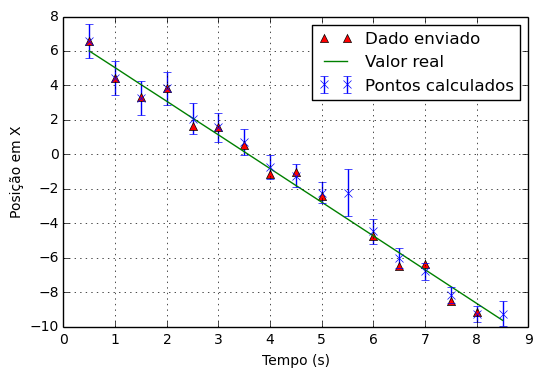

In [18]:
plt.plot([a["time"]+0.5 for a in clistaLand], [a["pos"][0] for a in clistaLand], "r^", label="Dado enviado")
plt.plot([i["time"]+0.5 for i in listaLand], [i["pos"][0] for i in listaLand], "g", label= "Valor real")
plt.errorbar(DataLand["Tempo"], DataLand["Posição X"], DataLand["Erro PX"], fmt='bx', label= "Pontos calculados")
plt.xlabel("Tempo (s)")
plt.ylabel(u"Posição em X")
plt.ylim([-10, 8])
plt.xlim([0, 9])
plt.legend()
plt.grid()
plt.show()

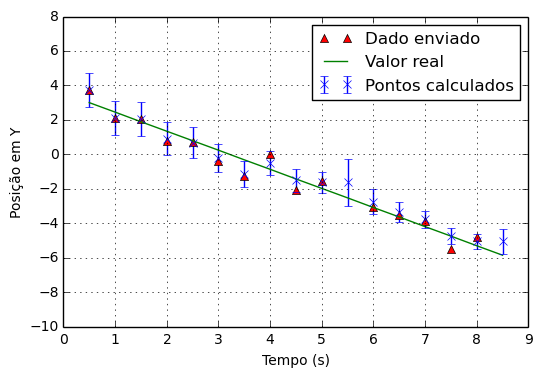

In [19]:
plt.plot([a["time"]+0.5 for a in clistaLand], [a["pos"][1] for a in clistaLand], "r^", label="Dado enviado")
plt.plot([i["time"]+0.5 for i in listaLand], [i["pos"][1] for i in listaLand], "g", label= "Valor real")
plt.errorbar(DataLand["Tempo"], DataLand["Posição Y"], DataLand["Erro PY"], fmt='bx', label= "Pontos calculados")
plt.xlabel("Tempo (s)")
plt.ylabel(u"Posição em Y")
plt.ylim([-10, 8])
plt.xlim([0, 9])
plt.legend()
plt.grid()
plt.show()

# Analisando dados de Robo 1

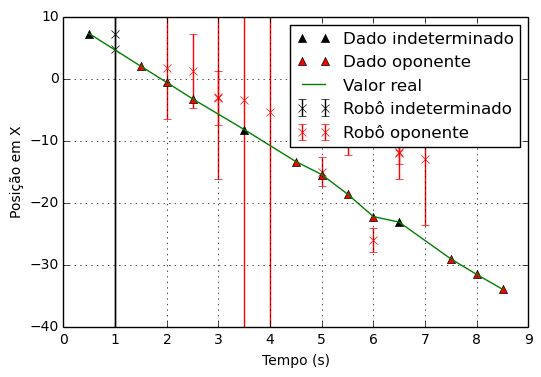

In [20]:
plt.errorbar(
    DataRob1["Tempo"][DataRob1.Time == 0],
    DataRob1["Posição X"][DataRob1.Time == 0],
    DataRob1["Erro PX"][DataRob1.Time == 0],
    fmt='kx',
    label= u"Robô indeterminado"
)
if max(DataRob1.Time[DataRob1.Time != 0]) == -1:
    plt.errorbar(
        DataRob1["Tempo"][DataRob1.Time != 0],
        DataRob1["Posição X"][DataRob1.Time != 0],
        DataRob1["Erro PX"][DataRob1.Time != 0],
        fmt='rx',
        label= u"Robô oponente"
    )
else:
    plt.errorbar(
        DataRob1["Tempo"][DataRob1.Time != 0],
        DataRob1["Posição X"][DataRob1.Time != 0],
        DataRob1["Erro PX"][DataRob1.Time != 0],
        fmt='cx',
        label= u"Robô aliado"
    )
    
if max(DataRob1.Time[DataRob1.Time != 0]) == -1:
    plt.plot(
        [a["time"]+0.5 for a in clistaOponente if a["tag"] == 2],
        [a["pos"][0] for a in clistaOponente if a["tag"] == 2],
        "k^",
        label="Dado indeterminado"
    )
    
    plt.plot(
        [a["time"]+0.5 for a in clistaOponente if a["tag"] != 2],
        [a["pos"][0] for a in clistaOponente if a["tag"] != 2],
        "r^",
        label="Dado oponente"
    )
else:
    plt.plot(
        [a["time"]+0.5 for a in clistaAliado if a["tag"] == 2],
        [a["pos"][0] for a in clistaAliado if a["tag"] == 2],
        "k^",
        label="Dado indeterminado"
    )
    
    plt.plot(
        [a["time"]+0.5 for a in clistaAliado if a["tag"] != 2],
        [a["pos"][0] for a in clistaAliado if a["tag"] != 2],
        "r^",
        label="Dado aliado"
    )

if max(DataRob1.Time[DataRob1.Time != 0]) == -1:
    plt.plot([i["time"]+0.5 for i in clistaOponente], [i["pos"][0] for i in clistaOponente], "g", label= "Valor real")
else:
    plt.plot([i["time"]+0.5 for i in clistaAliado], [i["pos"][0] for i in clistaAliado], "g", label= "Valor real")
    
plt.xlabel("Tempo (s)")
plt.ylabel(u"Posição em X")
plt.ylim([-40, 10])
plt.xlim([0, 9])
plt.legend()
plt.grid()
plt.show()

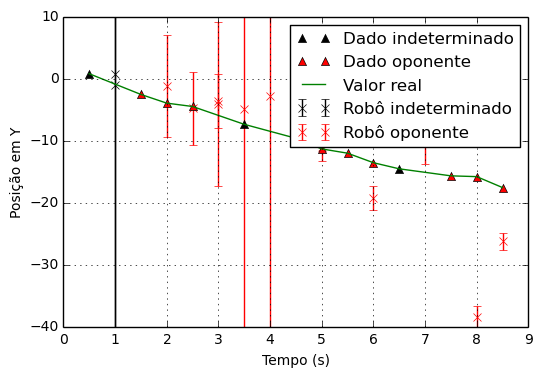

In [21]:
plt.errorbar(
    DataRob1["Tempo"][DataRob1.Time == 0],
    DataRob1["Posição Y"][DataRob1.Time == 0],
    DataRob1["Erro PY"][DataRob1.Time == 0],
    fmt='kx',
    label= u"Robô indeterminado"
)
if max(DataRob1.Time[DataRob1.Time != 0]) == -1:
    plt.errorbar(
        DataRob1["Tempo"][DataRob1.Time != 0],
        DataRob1["Posição Y"][DataRob1.Time != 0],
        DataRob1["Erro PY"][DataRob1.Time != 0],
        fmt='rx',
        label= u"Robô oponente"
    )
else:
    plt.errorbar(
        DataRob1["Tempo"][DataRob1.Time != 0],
        DataRob1["Posição Y"][DataRob1.Time != 0],
        DataRob1["Erro PY"][DataRob1.Time != 0],
        fmt='cx',
        label= u"Robô aliado"
    )
    
if max(DataRob1.Time[DataRob1.Time != 0]) == -1:
    plt.plot(
        [a["time"]+0.5 for a in clistaOponente if a["tag"] == 2],
        [a["pos"][1] for a in clistaOponente if a["tag"] == 2],
        "k^",
        label="Dado indeterminado"
    )
    
    plt.plot(
        [a["time"]+0.5 for a in clistaOponente if a["tag"] != 2],
        [a["pos"][1] for a in clistaOponente if a["tag"] != 2],
        "r^",
        label="Dado oponente"
    )
else:
    plt.plot(
        [a["time"]+0.5 for a in clistaAliado if a["tag"] == 2],
        [a["pos"][1] for a in clistaAliado if a["tag"] == 2],
        "k^",
        label="Dado indeterminado"
    )
    
    plt.plot(
        [a["time"]+0.5 for a in clistaAliado if a["tag"] != 2],
        [a["pos"][1] for a in clistaAliado if a["tag"] != 2],
        "r^",
        label="Dado aliado"
    )

if max(DataRob1.Time[DataRob1.Time != 0]) == -1:
    plt.plot([i["time"]+0.5 for i in clistaOponente], [i["pos"][1] for i in clistaOponente], "g", label= "Valor real")
else:
    plt.plot([i["time"]+0.5 for i in clistaAliado], [i["pos"][1] for i in clistaAliado], "g", label= "Valor real")
    
plt.xlabel("Tempo (s)")
plt.ylabel(u"Posição em Y")
plt.ylim([-40, 10])
plt.xlim([0, 9])
plt.legend()
plt.grid()
plt.show()

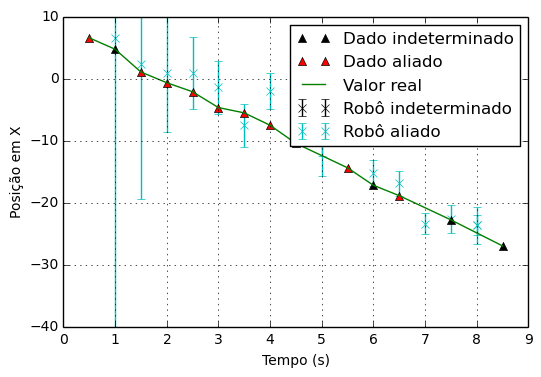

In [22]:
plt.errorbar(
    DataRob2["Tempo"][DataRob2.Time == 0],
    DataRob2["Posição X"][DataRob2.Time == 0],
    DataRob2["Erro PX"][DataRob2.Time == 0],
    fmt='kx',
    label= u"Robô indeterminado"
)
if max(DataRob2.Time[DataRob2.Time != 0]) == -1:
    plt.errorbar(
        DataRob2["Tempo"][DataRob2.Time != 0],
        DataRob2["Posição X"][DataRob2.Time != 0],
        DataRob2["Erro PX"][DataRob2.Time != 0],
        fmt='rx',
        label= u"Robô oponente"
    )
else:
    plt.errorbar(
        DataRob2["Tempo"][DataRob2.Time != 0],
        DataRob2["Posição X"][DataRob2.Time != 0],
        DataRob2["Erro PX"][DataRob2.Time != 0],
        fmt='cx',
        label= u"Robô aliado"
    )
    
if max(DataRob2.Time[DataRob2.Time != 0]) == -1:
    plt.plot(
        [a["time"]+0.5 for a in clistaOponente if a["tag"] == 2],
        [a["pos"][0] for a in clistaOponente if a["tag"] == 2],
        "k^",
        label="Dado indeterminado"
    )
    
    plt.plot(
        [a["time"]+0.5 for a in clistaOponente if a["tag"] != 2],
        [a["pos"][0] for a in clistaOponente if a["tag"] != 2],
        "r^",
        label="Dado oponente"
    )
else:
    plt.plot(
        [a["time"]+0.5 for a in clistaAliado if a["tag"] == 2],
        [a["pos"][0] for a in clistaAliado if a["tag"] == 2],
        "k^",
        label="Dado indeterminado"
    )
    
    plt.plot(
        [a["time"]+0.5 for a in clistaAliado if a["tag"] != 2],
        [a["pos"][0] for a in clistaAliado if a["tag"] != 2],
        "r^",
        label="Dado aliado"
    )

if max(DataRob2.Time[DataRob2.Time != 0]) == -1:
    plt.plot([i["time"]+0.5 for i in clistaOponente], [i["pos"][0] for i in clistaOponente], "g", label= "Valor real")
else:
    plt.plot([i["time"]+0.5 for i in clistaAliado], [i["pos"][0] for i in clistaAliado], "g", label= "Valor real")
    
plt.xlabel("Tempo (s)")
plt.ylabel(u"Posição em X")
plt.ylim([-40, 10])
plt.xlim([0, 9])
plt.legend()
plt.grid()
plt.show()

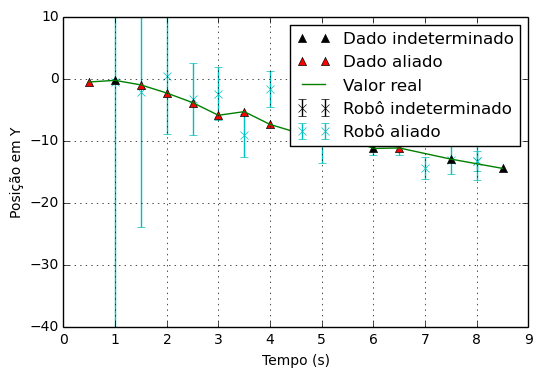

In [23]:
plt.errorbar(
    DataRob2["Tempo"][DataRob2.Time == 0],
    DataRob2["Posição Y"][DataRob2.Time == 0],
    DataRob2["Erro PY"][DataRob2.Time == 0],
    fmt='kx',
    label= u"Robô indeterminado"
)
if max(DataRob2.Time[DataRob2.Time != 0]) == -1:
    plt.errorbar(
        DataRob2["Tempo"][DataRob2.Time != 0],
        DataRob2["Posição Y"][DataRob2.Time != 0],
        DataRob2["Erro PY"][DataRob2.Time != 0],
        fmt='rx',
        label= u"Robô oponente"
    )
else:
    plt.errorbar(
        DataRob2["Tempo"][DataRob2.Time != 0],
        DataRob2["Posição Y"][DataRob2.Time != 0],
        DataRob2["Erro PY"][DataRob2.Time != 0],
        fmt='cx',
        label= u"Robô aliado"
    )
    
if max(DataRob2.Time[DataRob2.Time != 0]) == -1:
    plt.plot(
        [a["time"]+0.5 for a in clistaOponente if a["tag"] == 2],
        [a["pos"][1] for a in clistaOponente if a["tag"] == 2],
        "k^",
        label="Dado indeterminado"
    )
    
    plt.plot(
        [a["time"]+0.5 for a in clistaOponente if a["tag"] != 2],
        [a["pos"][1] for a in clistaOponente if a["tag"] != 2],
        "r^",
        label="Dado oponente"
    )
else:
    plt.plot(
        [a["time"]+0.5 for a in clistaAliado if a["tag"] == 2],
        [a["pos"][1] for a in clistaAliado if a["tag"] == 2],
        "k^",
        label="Dado indeterminado"
    )
    
    plt.plot(
        [a["time"]+0.5 for a in clistaAliado if a["tag"] != 2],
        [a["pos"][1] for a in clistaAliado if a["tag"] != 2],
        "r^",
        label="Dado aliado"
    )

if max(DataRob2.Time[DataRob2.Time != 0]) == -1:
    plt.plot([i["time"]+0.5 for i in clistaOponente], [i["pos"][1] for i in clistaOponente], "g", label= "Valor real")
else:
    plt.plot([i["time"]+0.5 for i in clistaAliado], [i["pos"][1] for i in clistaAliado], "g", label= "Valor real")
    
plt.xlabel("Tempo (s)")
plt.ylabel(u"Posição em Y")
plt.ylim([-40, 10])
plt.xlim([0, 9])
plt.legend()
plt.grid()
plt.show()